# Definir funciones e imports

## Cargar todos los archivos en una carpeta

In [2]:
%load_ext autoreload
%autoreload 2
import os
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

# Ruta principal donde se encuentran los subdirectorios
main_dir = "outputs/Balder_T0_M100_tan"

def load_perform_files_from_folder(main_dir):
    # Inicializar lista para almacenar el contenido de los archivos .mat
    list_perform = []

    # Recorrer todos los subdirectorios y archivos
    for root, dirs, files in os.walk(main_dir):
        for file in files:
            # Si el archivo es 'perform.mat', lo cargamos
            if file == 'perform.mat':
                # Construir la ruta completa al archivo
                file_path = os.path.join(root, file)
                # Cargar el archivo .mat
                mat_data = loadmat(file_path)
                # Añadir el contenido del archivo a la lista
                list_perform.append(mat_data)

    # Ahora list_perform contiene todos los archivos perform.mat cargados
    print(f"Se han cargado {len(list_perform)} archivos 'perform.mat'.")

    return list_perform

##  Cargar parametros del dict a traves del nombre del archivo

In [3]:
def vars_from_BSname(fname):
    # Convertir a string
    cadena = str(fname)
    # Encontrar posiciones
    inicio = cadena.find('BS')
    fin = cadena.rfind('.mat')
    # Extraer el substring
    fname = cadena[inicio:fin]

    # Dividir el nombre del archivo por los guiones bajos
    partes = fname.split('_')

    # Inicializar un diccionario para almacenar los valores
    sk_params = {}

    # Extraer las sk_params
    for i in range(len(partes)):
        if partes[i] == 'm':
            sk_params['M'] = int(partes[i + 1])
        elif partes[i] == 'n':
            sk_params['N'] = int(partes[i + 1])
        elif partes[i] == 'vsc':
            sk_params['n_v_scales'] = int(partes[i + 1])
        elif partes[i] == 'hsc':
            sk_params['n_h_scales'] = int(partes[i + 1])
        elif partes[i] == 'bases':
            bases = [float(partes[i + 1]), float(partes[i + 2])]
            sk_params['bases'] = bases
        elif partes[i] == 'thV':
            sk_params['n_v_thetas'] = int(partes[i + 1])
        elif partes[i] == 'thH':
            sk_params['n_h_thetas'] = int(partes[i + 1])

    return sk_params
        
# fname = list_perform[0]['dic_name']
# sk_params = vars_from_BSname(fname)
# # print(fname)
# print(sk_params)


# Cargar archivos

In [4]:
ls_tan = load_perform_files_from_folder(r"outputs/pad_r0.50\Balder_T0_M100_tan")
ls_tanh = load_perform_files_from_folder(r"outputs/pad_r0.50\Balder_T0_M100_tanh")
ls_sh = load_perform_files_from_folder(r"outputs/pad_r0.50\Balder_T0_M100_sh")
ls_tan_1000 = load_perform_files_from_folder(r"outputs/pad_r0.50\Balder_T1000_M100_tan")
ls_tanh_1000 = load_perform_files_from_folder(r"outputs/pad_r0.50\Balder_T1000_M100_tanh")
ls_sh_1000 = load_perform_files_from_folder(r"outputs/pad_r0.50\Balder_T1000_M100_sh")

# ls_tan = load_perform_files_from_folder(r"outputs/extrap_r0.50\Balder_T0_M100_tan")
# ls_tanh = load_perform_files_from_folder(r"outputs/extrap_r0.50\Balder_T0_M100_tanh")
# ls_sh = load_perform_files_from_folder(r"outputs/extrap_r0.50\Balder_T0_M100_sh")
# ls_tan = load_perform_files_from_folder(r"outputs/extrap_r0.50\Balder_T1000_M100_tan")
# ls_tanh = load_perform_files_from_folder(r"outputs/extrap_r0.50\Balder_T1000_M100_tanh")
# ls_sh = load_perform_files_from_folder(r"outputs/extrap_r0.50\Balder_T1000_M100_sh")



Se han cargado 9 archivos 'perform.mat'.
Se han cargado 9 archivos 'perform.mat'.
Se han cargado 1 archivos 'perform.mat'.
Se han cargado 9 archivos 'perform.mat'.
Se han cargado 9 archivos 'perform.mat'.
Se han cargado 5 archivos 'perform.mat'.


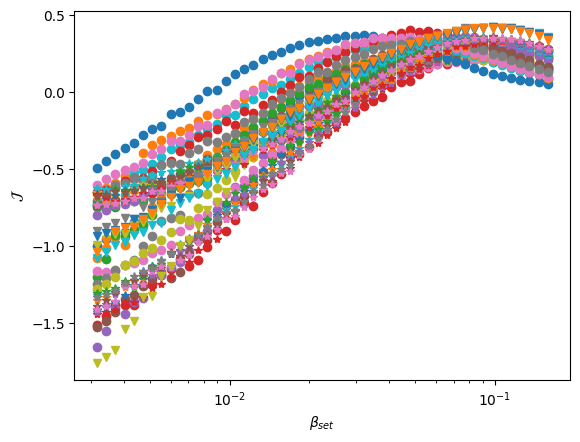

In [5]:

varX = "beta_set"
varY = "Jcurve"
xlab = r"$\beta_{set}$"
ylab = r"$\mathcal{J}$"

fig, ax = plt.subplots()
for data in ls_tan:
    x = data[varX].flatten()
    y = data[varY].flatten()
    ax.plot(x, y, 'o')

for data in ls_tanh:
    x = data[varX].flatten()
    y = data[varY].flatten()
    ax.plot(x, y, '*')

for data in ls_sh:
    x = data[varX].flatten()
    y = data[varY].flatten()
    ax.plot(x, y, 'v')

#---------------------------------------
for data in ls_tan_1000:
    x = data[varX].flatten()
    y = data[varY].flatten()
    ax.plot(x, y, 'o')
for data in ls_tanh_1000:
    x = data[varX].flatten()
    y = data[varY].flatten()
    ax.plot(x, y, '*')
for data in ls_sh_1000:
    x = data[varX].flatten()
    y = data[varY].flatten()
    ax.plot(x, y, 'v')
#----------------------------------------
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
ax.set_xscale('log')
plt.show()



['BS_m_128_n_128_vsc_2_hsc_2_bases_0.5_0.5_thV_15_thH_15.mat']
['BS_m_128_n_128_vsc_2_hsc_2_bases_0.5_0.5_thV_15_thH_3.mat']
['BS_m_128_n_128_vsc_2_hsc_2_bases_0.5_0.5_thV_15_thH_7.mat']
['BS_m_128_n_128_vsc_2_hsc_2_bases_0.5_0.5_thV_3_thH_15.mat']
['BS_m_128_n_128_vsc_2_hsc_2_bases_0.5_0.5_thV_3_thH_3.mat']
['BS_m_128_n_128_vsc_2_hsc_2_bases_0.5_0.5_thV_3_thH_7.mat']
['BS_m_128_n_128_vsc_2_hsc_2_bases_0.5_0.5_thV_7_thH_15.mat']
['BS_m_128_n_128_vsc_2_hsc_2_bases_0.5_0.5_thV_7_thH_3.mat']
['BS_m_128_n_128_vsc_2_hsc_2_bases_0.5_0.5_thV_7_thH_7.mat']
['BS_m_128_n_128_vsc_2_hsc_2_bases_0.5_0.5_thV_15_thH_15.mat']
['BS_m_128_n_128_vsc_2_hsc_2_bases_0.5_0.5_thV_15_thH_3.mat']
['BS_m_128_n_128_vsc_2_hsc_2_bases_0.5_0.5_thV_15_thH_7.mat']
['BS_m_128_n_128_vsc_2_hsc_2_bases_0.5_0.5_thV_3_thH_15.mat']
['BS_m_128_n_128_vsc_2_hsc_2_bases_0.5_0.5_thV_3_thH_3.mat']
['BS_m_128_n_128_vsc_2_hsc_2_bases_0.5_0.5_thV_3_thH_7.mat']
['BS_m_128_n_128_vsc_2_hsc_2_bases_0.5_0.5_thV_7_thH_15.mat']
['BS_m_128_n

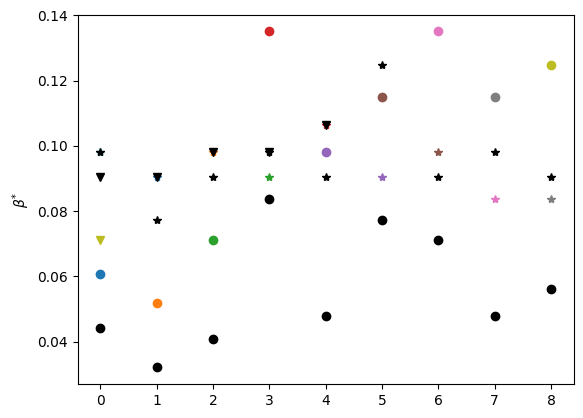

In [7]:
varY = "beta_star"
ylab = r"$\beta^{*}$"


fig, ax = plt.subplots()

for i, data in enumerate(ls_tan):
    sk_params = vars_from_BSname(data['dic_name'])
    print(data['dic_name'])
    y = data[varY].flatten()
    # str_label = f"M:{sk_params['M']}  N:{sk_params['N']}"
    str_label = rf"$n_{{\theta, v}}$:{sk_params['n_v_thetas']}  $n_{{\theta, h}}$:{sk_params['n_h_thetas']}"
    ax.plot(i, y, 'o', label=str_label)

for i, data in enumerate(ls_tanh):
    sk_params = vars_from_BSname(data['dic_name'])
    print(data['dic_name'])
    y = data[varY].flatten()
    # str_label = f"M:{sk_params['M']}  N:{sk_params['N']}"
    str_label = rf"$n_{{\theta, v}}$:{sk_params['n_v_thetas']}  $n_{{\theta, h}}$:{sk_params['n_h_thetas']}"
    ax.plot(i, y, '*', label=str_label)

for i, data in enumerate(ls_sh):
    sk_params = vars_from_BSname(data['dic_name'])
    print(data['dic_name'])
    y = data[varY].flatten()
    # str_label = f"M:{sk_params['M']}  N:{sk_params['N']}"
    str_label = "Shearlets"
    ax.plot(i, y, 'v', label=str_label)

#-----------------------------------------------------------------
for i, data in enumerate(ls_tan_1000):
    sk_params = vars_from_BSname(data['dic_name'])
    print(data['dic_name'])
    y = data[varY].flatten()
    str_label = rf"$n_{{\theta, v}}$:{sk_params['n_v_thetas']}  $n_{{\theta, h}}$:{sk_params['n_h_thetas']}"
    ax.plot(i, y, 'ok', label=str_label)
for i, data in enumerate(ls_tanh_1000):
    sk_params = vars_from_BSname(data['dic_name'])
    print(data['dic_name'])
    y = data[varY].flatten()
    str_label = rf"$n_{{\theta, v}}$:{sk_params['n_v_thetas']}  $n_{{\theta, h}}$:{sk_params['n_h_thetas']}"
    ax.plot(i, y, '*k', label=str_label)
for i, data in enumerate(ls_sh_1000):
    sk_params = vars_from_BSname(data['dic_name'])
    print(data['dic_name'])
    y = data[varY].flatten()
    str_label = "Shearlets"
    ax.plot(i, y, 'vk', label=str_label)
# ------------------------------------------------------------------

# ax.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.36))
ax.set_ylabel(ylab)
plt.show()



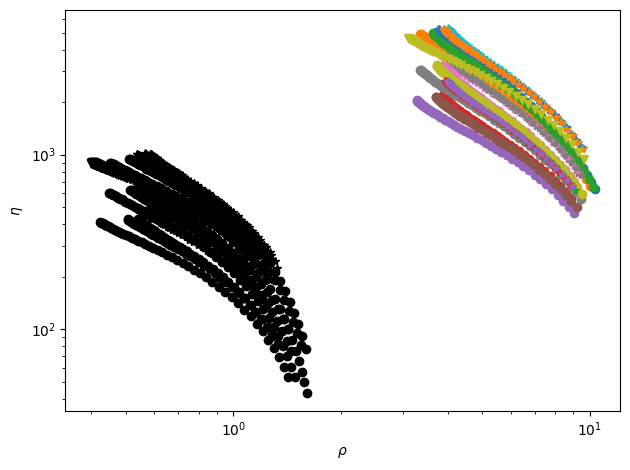

In [9]:

varX = "rho"
varY = "eta"
xlab = r"$\rho$"
ylab = r"$\eta$"

fig, ax = plt.subplots()
# ----------------------------------------------------------------
for data in ls_tan:
    x = data[varX].flatten()
    y = data[varY].flatten()
    sk_params = vars_from_BSname(data['dic_name'])
    str_label = rf"$n_{{\theta, v}}$:{sk_params['n_v_thetas']}  $n_{{\theta, h}}$:{sk_params['n_h_thetas']}"
    ax.plot(x, y, 'o', label=str_label)
for data in ls_tanh:
    x = data[varX].flatten()
    y = data[varY].flatten()
    sk_params = vars_from_BSname(data['dic_name'])
    str_label = rf"$n_{{\theta, v}}$:{sk_params['n_v_thetas']}  $n_{{\theta, h}}$:{sk_params['n_h_thetas']}"
    ax.plot(x, y, '*', label=str_label)
for data in ls_sh:
    x = data[varX].flatten()
    y = data[varY].flatten()
    sk_params = vars_from_BSname(data['dic_name'])
    str_label = "Shearlets"
    ax.plot(x, y, 'v', label=str_label)
# ----------------------------------------------------------------
for data in ls_tan_1000:
    x = data[varX].flatten()
    y = data[varY].flatten()
    sk_params = vars_from_BSname(data['dic_name'])
    str_label = rf"$n_{{\theta, v}}$:{sk_params['n_v_thetas']}  $n_{{\theta, h}}$:{sk_params['n_h_thetas']}"
    ax.plot(x, y, 'ok', label=str_label)
for data in ls_tanh_1000:
    x = data[varX].flatten()
    y = data[varY].flatten()
    sk_params = vars_from_BSname(data['dic_name'])
    str_label = rf"$n_{{\theta, v}}$:{sk_params['n_v_thetas']}  $n_{{\theta, h}}$:{sk_params['n_h_thetas']}"
    ax.plot(x, y, '*k', label=str_label)
for data in ls_sh_1000:
    x = data[varX].flatten()
    y = data[varY].flatten()
    sk_params = vars_from_BSname(data['dic_name'])
    str_label = "Shearlets"
    ax.plot(x, y, 'vk', label=str_label)
# ----------------------------------------------------------------

# ax.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.46))

ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
ax.set_xscale('log')
ax.set_yscale('log')
plt.tight_layout()
plt.show()

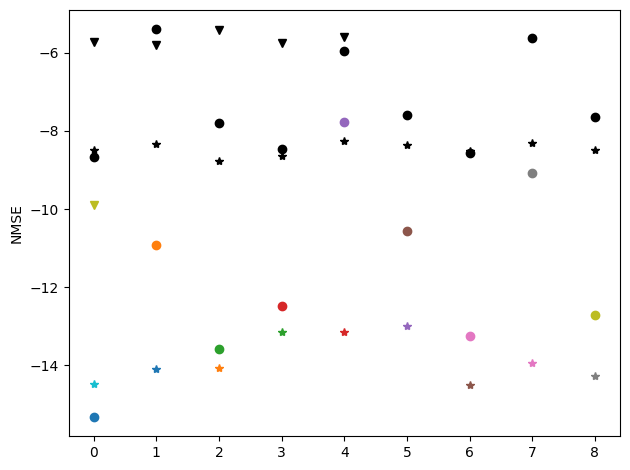

In [11]:

varX = "rho"
varY = "NMSE"
xlab = r""
ylab = r"NMSE"

fig, ax = plt.subplots()
# --------------------------------------------------------------------------------
for i, data in enumerate(ls_tan):
    x = i
    y = data[varY].flatten()
    sk_params = vars_from_BSname(data['dic_name'])
    str_label = rf"$n_{{\theta, v}}$:{sk_params['n_v_thetas']}  $n_{{\theta, h}}$:{sk_params['n_h_thetas']}"
    ax.plot(x, y, 'o', label=str_label)
for i, data in enumerate(ls_tanh):
    x = i
    y = data[varY].flatten()
    sk_params = vars_from_BSname(data['dic_name'])
    str_label = rf"$n_{{\theta, v}}$:{sk_params['n_v_thetas']}  $n_{{\theta, h}}$:{sk_params['n_h_thetas']}"
    ax.plot(x, y, '*', label=str_label)
for i, data in enumerate(ls_sh):
    x = i
    y = data[varY].flatten()
    sk_params = vars_from_BSname(data['dic_name'])
    str_label = "Shearlets"
    ax.plot(x, y, 'v', label=str_label)
# --------------------------------------------------------------------------------
for i, data in enumerate(ls_tan_1000):
    x = i
    y = data[varY].flatten()
    sk_params = vars_from_BSname(data['dic_name'])
    str_label = rf"$n_{{\theta, v}}$:{sk_params['n_v_thetas']}  $n_{{\theta, h}}$:{sk_params['n_h_thetas']}"
    ax.plot(x, y, 'ok', label=str_label)
for i, data in enumerate(ls_tanh_1000):
    x = i
    y = data[varY].flatten()
    sk_params = vars_from_BSname(data['dic_name'])
    str_label = rf"$n_{{\theta, v}}$:{sk_params['n_v_thetas']}  $n_{{\theta, h}}$:{sk_params['n_h_thetas']}"
    ax.plot(x, y, '*k', label=str_label)
for i, data in enumerate(ls_sh_1000):
    x = i
    y = data[varY].flatten()
    sk_params = vars_from_BSname(data['dic_name'])
    str_label = "Shearlets"
    ax.plot(x, y, 'vk', label=str_label)
# --------------------------------------------------------------------------------


# ax.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.5))

ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
# ax.set_xscale('log')
# ax.set_yscale('log')
plt.tight_layout()
plt.show()